In [1]:
import pandas as pd

In [2]:
df_1 = pd.read_csv('processed/442100110323_clean.csv')

In [3]:
df_1.columns

Index(['ID', 'REF_NUMBER', 'LOCATION_CODE', 'SITE_CODE', 'METER_CODE',
       'PERIODE', 'READ_DATE', 'VOLTAGE_L1', 'VOLTAGE_L2', 'VOLTAGE_L3',
       'CURRENT_L1', 'CURRENT_L2', 'CURRENT_L3', 'POWER_FACTOR_TOTAL',
       'ACTIVE_POWER_TOTAL', 'REACTIVE_POWER_TOTAL', 'KWH_EXPORT_TOTAL',
       'KWH_IMPORT_TOTAL', 'KVARH_EXPORT_TOTAL', 'KVARH_IMPORT_TOTAL',
       'INSERT_BY', 'INSERT_DATE', 'DATE_READ'],
      dtype='object')

In [4]:
# rumus KWH EXP =-((voltage A*current A)+(voltage A*current B)+(voltage A*current C))*power faktor*15/60
df_1['KWH_EXP'] = abs(((df_1['VOLTAGE_L1']*df_1['CURRENT_L1'])+(df_1['VOLTAGE_L1']*df_1['CURRENT_L2'])+(df_1['VOLTAGE_L1']*df_1['CURRENT_L3']))*df_1['POWER_FACTOR_TOTAL']*15/60)

# bandingkan KWH EXP dengan KWH EXP TOTAL
df_1[['KWH_EXP','KWH_EXPORT_TOTAL']]

,KWH_EXP,KWH_EXPORT_TOTAL
0,2.334143,2
1,2.344050,2
2,2.500311,2
3,2.432096,3
4,2.388465,2
...,...,...
166097,68.226236,69
166098,69.132420,69
166099,68.774401,70
166100,68.765215,69


In [5]:
df_1['KWH_EXP'].describe()

count    166102.000000
mean          9.352583
std           9.246701
min           0.000000
25%           2.323053
50%           7.081912
75%          13.781621
max          80.882348
Name: KWH_EXP, dtype: float64

<Axes: >

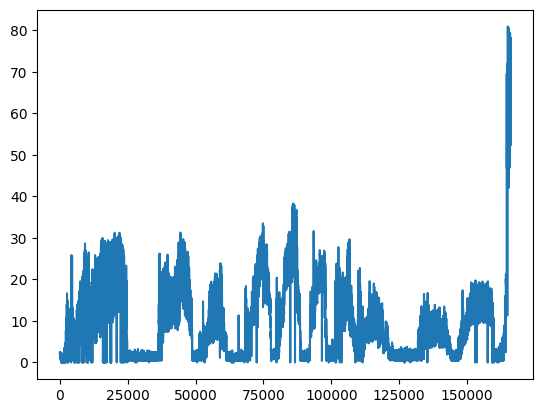

In [6]:
df_1['KWH_EXP'].plot()

KWH EXP di tahun 2024 ada lonjakan yang signifikan dibandingkan beberapa tahun sebelumnya

In [7]:
# cek kembali data tahun 2024
df_raw = pd.read_csv('processed/442100110323_clean.csv')
df_raw['READ_DATE'] = pd.to_datetime(df_raw['READ_DATE'])
df_2024 = df_raw[df_raw['READ_DATE'].dt.year == 2024]
df_2024

,ID,REF_NUMBER,LOCATION_CODE,SITE_CODE,METER_CODE,PERIODE,READ_DATE,VOLTAGE_L1,VOLTAGE_L2,VOLTAGE_L3,...,POWER_FACTOR_TOTAL,ACTIVE_POWER_TOTAL,REACTIVE_POWER_TOTAL,KWH_EXPORT_TOTAL,KWH_IMPORT_TOTAL,KVARH_EXPORT_TOTAL,KVARH_IMPORT_TOTAL,INSERT_BY,INSERT_DATE,DATE_READ
157601,46254683264,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 00:00:00,59.812664,60.018795,59.795486,...,-0.856934,61.262375,35.736385,15,0,10,0,HES,2024-02-02 01:03:49,20240101
157602,46254557948,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 00:15:00,59.692420,59.898552,59.675243,...,-0.845947,61.262375,37.438118,16,0,9,0,HES,2024-02-02 01:03:49,20240101
157603,46254558078,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 00:30:00,59.743954,59.915730,59.743954,...,-0.834961,61.262375,39.139850,16,0,10,0,HES,2024-02-02 01:03:49,20240101
157604,46253945119,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 00:45:00,59.829840,60.053150,59.864197,...,-0.834961,61.262375,39.139850,16,0,11,0,HES,2024-02-02 01:03:49,20240101
157605,46254794005,C4900CE9542BFCA306DEFF2409E9B23D,442100110323,44210,217218176,202401,2024-01-01 01:00:00,59.847020,60.104683,59.881374,...,-0.823975,61.262375,40.841583,15,0,10,0,HES,2024-02-02 01:03:49,20240101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166097,51946309656,06DBD7BB82596E964340C73AC0D01C94,442100110323,44210,251548790,202405,2024-05-31 21:45:00,59.898552,60.001617,59.812664,...,-0.758057,272.277220,231.435640,69,0,58,0,HES,2024-08-10 02:59:31,20240531
166098,51946009618,06DBD7BB82596E964340C73AC0D01C94,442100110323,44210,251548790,202405,2024-05-31 22:00:00,59.932907,60.035973,59.847020,...,-0.758057,275.680700,234.839110,69,0,60,0,HES,2024-08-10 02:59:31,20240531
166099,51946301225,06DBD7BB82596E964340C73AC0D01C94,442100110323,44210,251548790,202405,2024-05-31 23:15:00,60.207752,60.327995,60.121860,...,-0.747070,277.382420,239.944300,70,0,61,0,HES,2024-08-10 02:59:32,20240531
166100,51946475985,06DBD7BB82596E964340C73AC0D01C94,442100110323,44210,251548790,202405,2024-05-31 23:30:00,60.259285,60.396706,60.190575,...,-0.747070,277.382420,239.944300,69,0,60,0,HES,2024-08-10 02:59:32,20240531


In [8]:
# buat dataframe baru yang hanya berisi READ_DATE dan KWH_EXP
df = df_1[['READ_DATE','KWH_EXP']]

# convert READ_DATE to datetime
df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df.set_index('READ_DATE',inplace=True)

df.to_csv('processed/442100110323_standard.csv')

/tmp/ipykernel_59045/1370718161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])


In [9]:
df

,KWH_EXP
READ_DATE,
2019-01-01 00:00:00,2.334143
2019-01-01 00:15:00,2.344050
2019-01-01 00:30:00,2.500311
2019-01-01 00:45:00,2.432096
2019-01-01 01:00:00,2.388465
...,...
2024-05-31 21:45:00,68.226236
2024-05-31 22:00:00,69.132420
2024-05-31 23:15:00,68.774401


### Resample Hourly, Daily, Weekly, Monthly

Mencari pola tren dan seasonality dari data di timeframe yang berbeda

<Axes: xlabel='READ_DATE'>

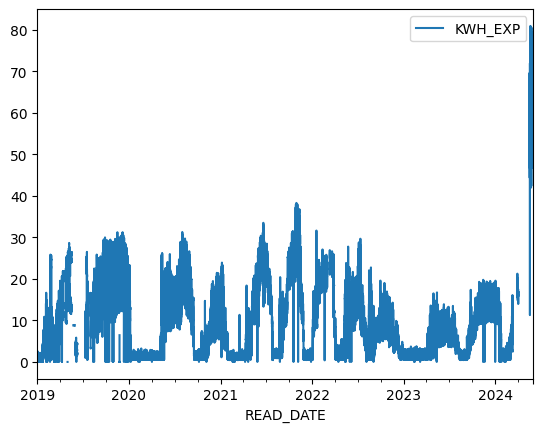

In [10]:
# ada pencatatan yang tidak kerecord, normalnya dia per 15 menit jadi harusnya ada 4 data per jam. Tapi ada yang 3 data per jam bahkan tidak ada data sama sekali
# contoh : 2019-01-11 20.00.00, 2019-01-11 22.15.00, 2019-01-11 23.00.00
# mari isi kelenngkapan data yang hilang dengan nilai NaN untuk setiap fiturnya. Sehingga normal jadi 2019-01-11 20.00.00, 2019-01-11 20.15.00, 2019-01-11 20.30.00, 2019-01-11 20.45.00
df = df.resample('15min').mean()
df.plot()

/tmp/ipykernel_59045/1231241643.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


<Axes: xlabel='READ_DATE'>

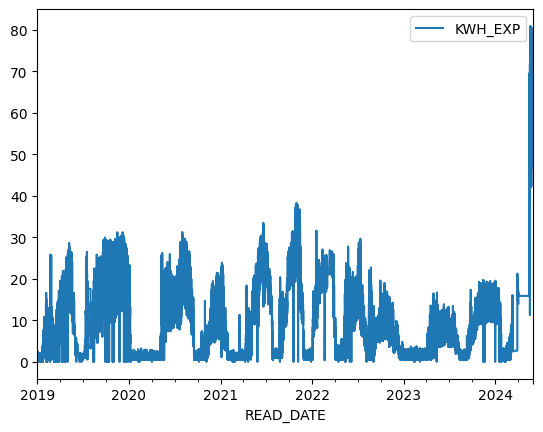

In [11]:
# fillna untuk mengisi nilai NaN
df.fillna(method='ffill',inplace=True)
# df.interpolate(method='linear',inplace=True)
df.plot()

In [12]:
df.to_csv('processed/442100110323_standard.csv')

<Axes: xlabel='READ_DATE'>

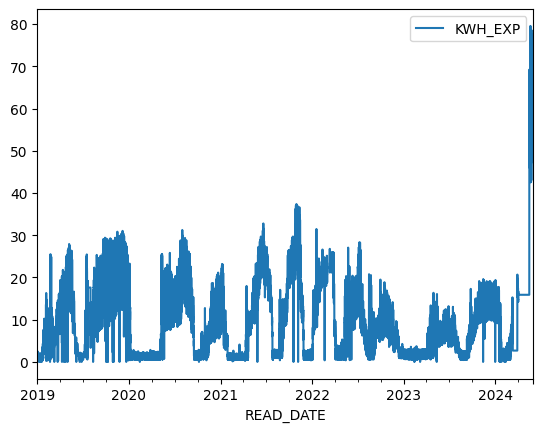

In [147]:
# resample menjadi 1 jam dan hitung rata-rata
df_hourly = df.resample('1h').mean()
df_hourly.to_csv('processed/442100110323_hourly.csv')
df_hourly.plot()

In [165]:
df_hourly

,KWH_EXP
READ_DATE,
2019-01-01 00:00:00,2.402650
2019-01-01 01:00:00,2.408348
2019-01-01 02:00:00,2.406840
2019-01-01 03:00:00,2.256511
2019-01-01 04:00:00,2.065598
...,...
2024-05-31 19:00:00,65.205495
2024-05-31 20:00:00,65.520523
2024-05-31 21:00:00,66.389436


<Axes: xlabel='READ_DATE'>

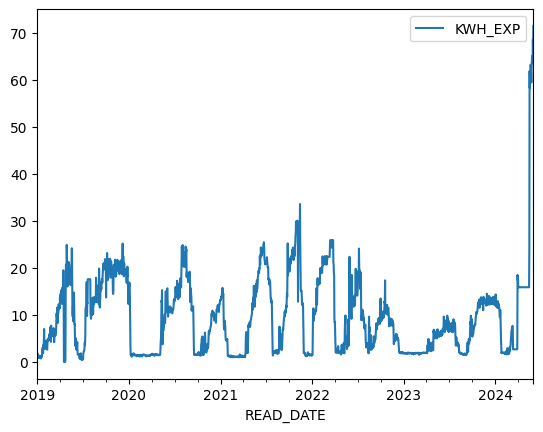

In [148]:
# resample menjadi 1 hari dan hitung rata-rata
df_daily = df_hourly.resample('1D').mean()
df_daily.to_csv('processed/442100110323_daily.csv')
df_daily.plot()

<Axes: xlabel='READ_DATE'>

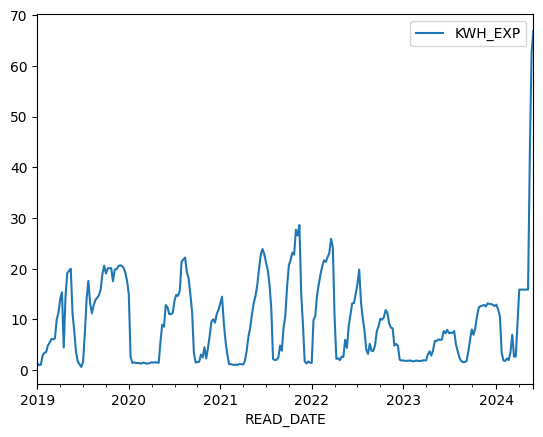

In [149]:
# resample menjadi 1 minggu dan hitung rata-rata
df_weekly = df_daily.resample('1W').mean()
df_weekly.to_csv('processed/442100110323_weekly.csv')
df_weekly.plot()

/tmp/ipykernel_1526/1170976162.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_weekly.resample('1M').mean()


<Axes: xlabel='READ_DATE'>

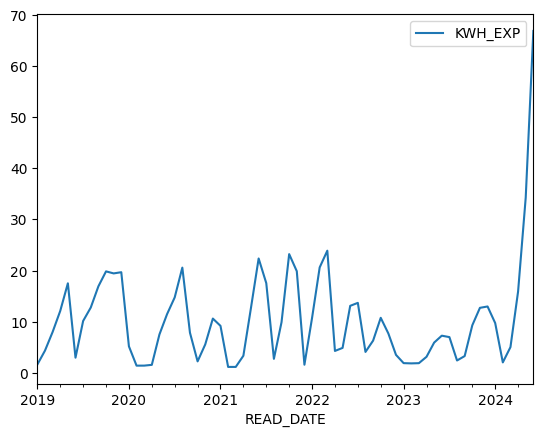

In [150]:
# resample menjadi 1 bulan dan hitung rata-rata
df_monthly = df_weekly.resample('1M').mean()
df_monthly.to_csv('processed/442100110323_monthly.csv')
df_monthly.plot()

### Climate Data

In [151]:
df_2019 = pd.read_excel('raw/2019.xlsx')
df_2020 = pd.read_excel('raw/2020.xlsx')
df_2021 = pd.read_excel('raw/2021.xlsx')
df_2022 = pd.read_excel('raw/2022.xlsx')
df_2023 = pd.read_excel('raw/2023.xlsx')
df_2024 = pd.read_excel('raw/2024.xlsx')

In [152]:
df_2019['Tanggal'] = pd.to_datetime(df_2019['Tanggal'], dayfirst=True)
df_2020['Tanggal'] = pd.to_datetime(df_2020['Tanggal'], dayfirst=True)
df_2021['Tanggal'] = pd.to_datetime(df_2021['Tanggal'], dayfirst=True)
df_2022['Tanggal'] = pd.to_datetime(df_2022['Tanggal'], dayfirst=True)
df_2023['Tanggal'] = pd.to_datetime(df_2023['Tanggal'], dayfirst=True)
df_2024['Tanggal'] = pd.to_datetime(df_2024['Tanggal'], dayfirst=True)
print(df_2019['Tanggal'].dtype, df_2020['Tanggal'].dtype, df_2021['Tanggal'].dtype, df_2022['Tanggal'].dtype, df_2023['Tanggal'].dtype, df_2024['Tanggal'].dtype)

datetime64[ns] datetime64[ns] datetime64[ns] datetime64[ns] datetime64[ns] datetime64[ns]


In [153]:
# merge data 2019-2024 menjadi satu dataframe
relevant_columns = ['Tanggal', 'Tavg', 'RH_avg', 'RR', 'ss']
df_all = pd.concat([df_2019[relevant_columns], df_2020[relevant_columns], df_2021[relevant_columns], df_2022[relevant_columns], df_2023[relevant_columns], df_2024[relevant_columns]])
df_all['Tanggal'] = pd.to_datetime(df_all['Tanggal'])
df_all.reset_index(drop=True, inplace=True)
df_all.tail(10)

,Tanggal,Tavg,RH_avg,RR,ss
1998,2024-06-21,27.0,67.0,0.0,10.4
1999,2024-06-22,28.1,66.0,0.0,10.3
2000,2024-06-23,27.7,70.0,0.0,10.2
2001,2024-06-24,26.7,77.0,0.0,6.4
2002,2024-06-25,27.3,74.0,0.8,4.2
2003,2024-06-26,27.4,76.0,0.0,8.0
2004,2024-06-27,27.8,77.0,0.0,9.9
2005,2024-06-28,28.4,76.0,0.0,10.8
2006,2024-06-29,28.6,65.0,0.0,10.0
2007,2024-06-30,28.7,66.0,0.0,8.3


* Tavg: Temperatur rata-rata (°C)
* RH_avg: Kelembapan rata-rata (%)
* RR: Curah hujan (mm)
* ss: Lamanya penyinaran matahari (jam)

* 8888: data tidak terukur
* 9999: Tidak Ada Data (tidak dilakukan pengukuran)


In [154]:
df_all.isna().sum()

Tanggal     0
Tavg       10
RH_avg     10
RR         12
ss         20
dtype: int64

In [155]:
# cek apakah ada data dengan nilai 8888 = data tidak terukur dan 9999 = data tidak ada (missing data) pada semua kolom
# kemudian ganti nilai 8888 dan 9999 dengan NaN
df_all = df_all.replace(8888, None)
df_all = df_all.replace(9999, None)

df_all.isna().sum()

Tanggal      0
Tavg        10
RH_avg      10
RR         132
ss          20
dtype: int64

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

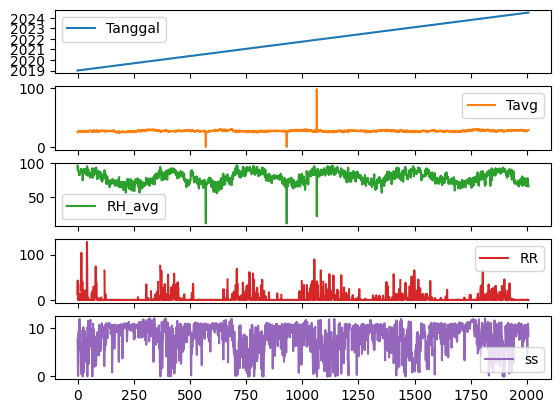

In [156]:
# plot feature di data 2019-2024 untuk melihat distribusi data
df_all.plot(subplots=True)

Ada beberapa cuaca ekstrem di Data

/root/miniconda3/envs/pbl/lib/python3.12/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/root/miniconda3/envs/pbl/lib/python3.12/site-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

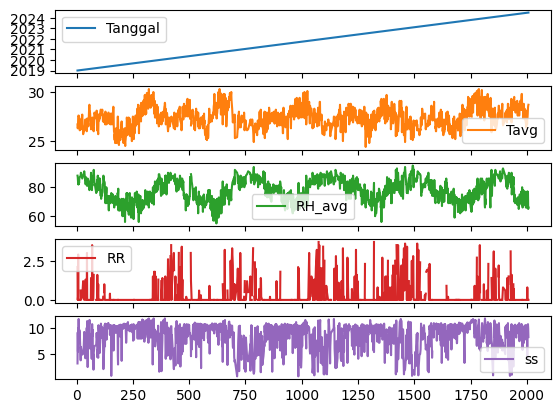

In [157]:
# cek outlier data 2019-2024 lalu jadikan dataframe baru khusus yang outlier dengan IQR
Q1 = df_all.quantile(0.25)
Q3 = df_all.quantile(0.75)
IQR = Q3 - Q1

# cek outlier
outlier = (df_all < (Q1 - 1.5 * IQR)) | (df_all > (Q3 + 1.5 * IQR))

# remove outlier
df_all_no_outlier = df_all[~outlier.any(axis=1)]
df_all_no_outlier.plot(subplots=True)


In [158]:
df_all_no_outlier.to_csv('processed/weather_2019_2024_no_outlier.csv')

cek nilai dari outlier nya

In [159]:
print(df_all[outlier['Tavg']])

print(df_all['Tavg'].describe())

        Tanggal  Tavg  RH_avg   RR    ss
179  2019-06-29  24.3    66.0  0.0  10.5
187  2019-07-07  23.6    66.0  0.0  10.6
571  2020-07-25   0.0    10.7  NaN   NaN
685  2020-11-16  30.4    68.0  0.0   9.0
686  2020-11-17  30.8    67.0  0.0  11.8
931  2021-07-20   0.0    10.6  NaN   NaN
1013 2021-10-10  30.5    60.0  0.0  10.5
1065 2021-12-01  99.0    21.1  2.7   NaN
1762 2023-10-29  30.5    66.0  0.0  11.5
1785 2023-11-21  30.9    69.0  0.0  10.0
1786 2023-11-22  30.8    66.0  0.0  11.2
count    1998.000000
mean       27.392643
std         2.121981
min         0.000000
25%        26.600000
50%        27.400000
75%        28.100000
max        99.000000
Name: Tavg, dtype: float64


Nilai rata-rata suhu yang bernilai 0 dan 99 tidak valid. Karena tidak mungkin. Kita bisa ubah nilai ini menjadi rata-rata suhu agar lebih masuk akal

In [160]:
print(df_all[outlier['RH_avg']])

print(df_all['RH_avg'].describe())

        Tanggal  Tavg  RH_avg   RR  ss
571  2020-07-25   0.0    10.7  NaN NaN
931  2021-07-20   0.0    10.6  NaN NaN
1065 2021-12-01  99.0    21.1  2.7 NaN
count    1998.000000
mean       78.180881
std         8.414145
min        10.600000
25%        72.000000
50%        78.000000
75%        85.000000
max        96.000000
Name: RH_avg, dtype: float64


In [161]:
print(df_all[outlier['RR']])

print(df_all['RR'].mean())

        Tanggal  Tavg  RH_avg    RR    ss
0    2019-01-01  25.7    96.0  12.9   7.5
1    2019-01-02  25.9    90.0  42.7   6.7
3    2019-01-04  25.8    88.0  34.6   0.1
13   2019-01-14  26.3    86.0  12.8   9.5
15   2019-01-16  25.6    91.0  34.8   5.6
...         ...   ...     ...   ...   ...
1915 2024-03-30  29.2    80.0  20.0   7.1
1921 2024-04-05  28.6    86.0  11.9   0.6
1922 2024-04-06  27.2    90.0   6.5   3.3
1923 2024-04-07  28.3    88.0  36.5   4.2
1924 2024-04-08  27.8    90.0  17.0  10.7

[362 rows x 5 columns]
3.972068230277185


In [162]:
print(df_all[outlier['ss']])

print(df_all['ss'].describe())

        Tanggal  Tavg  RH_avg     RR   ss
2    2019-01-03  24.9    94.0    0.5  0.1
3    2019-01-04  25.8    88.0   34.6  0.1
17   2019-01-18  26.0    90.0  104.0  0.5
22   2019-01-23  26.4    86.0   37.6  0.5
23   2019-01-24  27.4    74.0    0.2  0.0
44   2019-02-14  26.5    86.0   12.0  0.0
66   2019-03-08  26.6    83.0   18.4  0.0
369  2020-01-05  27.3    88.0   39.8  0.0
405  2020-02-10  26.9    86.0    2.1  0.0
416  2020-02-21  26.7    91.0   27.5  0.0
431  2020-03-07  26.2    91.0    4.8  0.6
505  2020-05-20  26.7    86.0    0.8  0.4
506  2020-05-21  27.4    81.0    1.2  0.2
701  2020-12-02  26.6    87.0    1.8  0.2
706  2020-12-07  26.8    89.0    5.2  0.1
710  2020-12-11  27.4    90.0   14.7  0.4
712  2020-12-13  25.7    94.0   35.5  0.4
756  2021-01-26  26.3    88.0    4.6  0.6
759  2021-01-29  26.8    89.0   16.3  0.0
760  2021-01-30  25.8    91.0   18.5  0.0
761  2021-01-31  25.9    90.0    7.0  0.0
765  2021-02-04  26.3    88.0   61.2  0.0
786  2021-02-25  26.3    95.0   43

Fitur RH_Avg, RR, Ss bisa dianggap normal sebagai kejadian alamiah

/tmp/ipykernel_1526/2818428061.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_all = df_all.interpolate(method='linear')


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

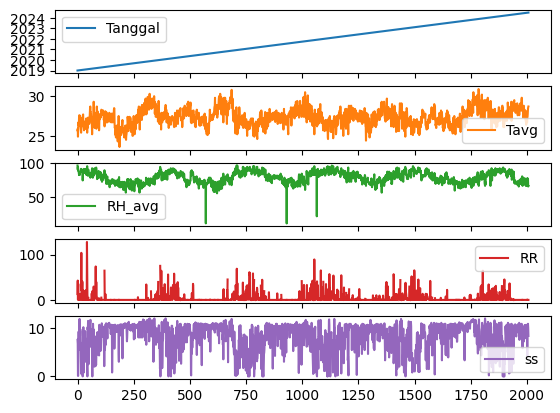

In [163]:
# ubah nilai 0 dan 99 di kolom Tavg menjadi mean
df_all['Tavg'] = df_all['Tavg'].replace(0, df_all['Tavg'].mean())
df_all['Tavg'] = df_all['Tavg'].replace(99, df_all['Tavg'].mean())

# fillna dengan metode interpolate linear
df_all = df_all.interpolate(method='linear')
df_all.plot(subplots=True)

In [164]:
print(df_all.shape, df_daily.shape)
df_all.to_csv('processed/weather_2019_2024_standard.csv')

(2008, 5) (1978, 1)
